## XOR Logic Gate

In [1]:
import numpy as np
np.random.seed(42)

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def der_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [3]:
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],
            [1],
            [1],
            [0]])
inp_d=x.shape[1]
hid_d=2
out_d=y.shape[1]

w1=np.random.rand(inp_d,hid_d)
b1=np.random.rand(1,hid_d)
w2=np.random.rand(hid_d,out_d)
b2=np.random.rand(1,out_d)

lr=0.1
epochs=100000

for i in range(epochs):
    z1=np.dot(x,w1)+b1
    a1=sigmoid(z1)
    z2=np.dot(a1,w2)+b2
    a2=sigmoid(z2)
    
    out_error=y-a2
    out_delta=out_error*der_sigmoid(a2)
    
    hid_error=out_delta.dot(w2.T)
    hid_delta=hid_error*der_sigmoid(a1)
    
    w2+=a1.T.dot(out_delta)*lr
    b2+=np.sum(out_delta,axis=0,keepdims=True)*lr
    w1+=x.T.dot(hid_delta)*lr
    b1+=np.sum(hid_delta,axis=0,keepdims=True)*lr


x_test=np.array([[0,0],[0,1],[1,0],[1,1]])    


dz1=np.dot(x_test,w1)+b1
da1=sigmoid(z1)
dz2=np.dot(a1,w2)+b2
da2=np.round(sigmoid(z2))

print(da2)
    
    
        
        
    

[[0.]
 [1.]
 [1.]
 [0.]]


## XNOR Logic Gate

In [5]:
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[1],
            [0],
            [0],
            [1]])
inp_d=x.shape[1]
hid_d=2
out_d=y.shape[1]

w1=np.random.rand(inp_d,hid_d)
b1=np.random.rand(1,hid_d)
w2=np.random.rand(hid_d,out_d)
b2=np.random.rand(1,out_d)

lr=0.1
epochs=100100

for i in range(epochs):
    z1=np.dot(x,w1)+b1
    a1=sigmoid(z1)
    z2=np.dot(a1,w2)+b2
    a2=sigmoid(z2)
    
    out_error=y-a2
    out_delta=out_error*der_sigmoid(a2)
    
    hid_error=out_delta.dot(w2.T)
    hid_delta=hid_error*der_sigmoid(a1)
    
    w2+=a1.T.dot(out_delta)*lr
    b2+=np.sum(out_delta,axis=0,keepdims=True)*lr
    w1+=x.T.dot(hid_delta)*lr
    b1+=np.sum(hid_delta,axis=0,keepdims=True)*lr


x_test=np.array([[0,0],[0,1],[1,0],[1,1]])    


dz1=np.dot(x_test,w1)+b1
da1=sigmoid(z1)
dz2=np.dot(a1,w2)+b2
da2=np.round(sigmoid(z2))

print(da2)
    
    
        
        
    

[[1.]
 [1.]
 [0.]
 [0.]]


In [6]:
w1

array([[ 0.19228172, -0.19778992],
       [ 6.80577807,  6.72904755]])

### 3. We cannot implent Single layer perceptron for mnist dataset since the number of features is itself 10

## Multi Layer Perceptron-MNIST dataset

In [41]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
import tensorflow
tensorflow.random.set_seed(42)

(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(-1,28*28)/255.0
x_test=x_test.reshape(-1,28*28)/255.0


y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [42]:
model=Sequential()
model.add(Dense(10,activation='softmax'))

In [43]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4653 - accuracy: 0.8780
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3035 - accuracy: 0.9150
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9207
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2728 - accuracy: 0.9236
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2669 - accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2621 - accuracy: 0.9268
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2581 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2558 - accuracy: 0.9291
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2531 - accuracy: 0.9299
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.251

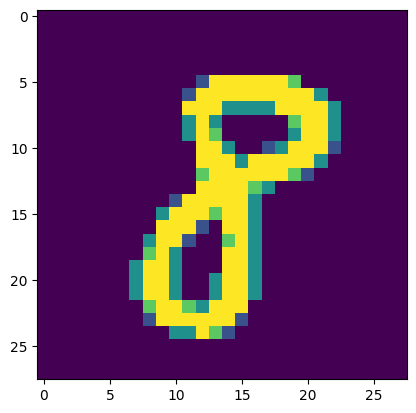

In [44]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=mnist.load_data()

plt.imshow(x_train[245])


In [45]:
print(x_train[245].shape)

(28, 28)


## Linear Regression using tensorflow

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [23]:
x=np.random.rand(100)*100
noise=np.random.randn(100)*15
y=2.5*x+10+noise

Text(0.5, 1.0, 'Random Linear Data')

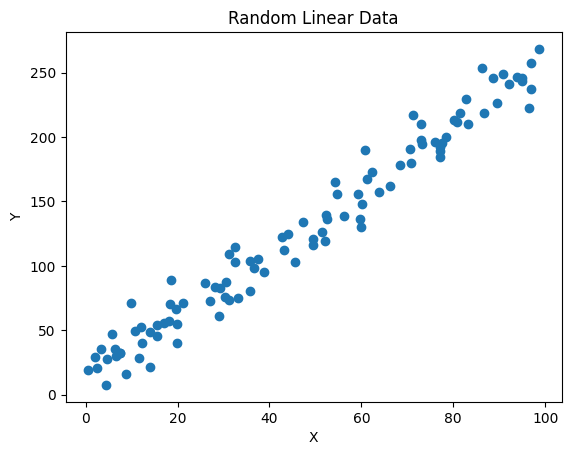

In [24]:
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Linear Data')

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow import keras

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

model=Sequential(
    layers.Dense(units=1,input_shape=(1,))
)

In [26]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='mean_squared_error')
model.fit(x,y,epochs=1000)

Epoch 1/1000
4/4 [==============================] - 1s 4ms/step - loss: 27135.0547
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 26440.5430
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 25716.7070
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 25058.8379
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 24361.1855
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 23655.0508
Epoch 7/1000
4/4 [==============================] - 0s 922us/step - loss: 23037.5176
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 22360.7617
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 21762.4141
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 21152.5742
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - loss: 20550.0684
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 19969.0605

4/4 [==============================] - 0s 2ms/step - loss: 754.8836
Epoch 100/1000
4/4 [==============================] - 0s 2ms/step - loss: 725.5139
Epoch 101/1000
4/4 [==============================] - 0s 1ms/step - loss: 698.7569
Epoch 102/1000
4/4 [==============================] - 0s 1ms/step - loss: 673.1478
Epoch 103/1000
4/4 [==============================] - 0s 2ms/step - loss: 646.0012
Epoch 104/1000
4/4 [==============================] - 0s 2ms/step - loss: 622.0976
Epoch 105/1000
4/4 [==============================] - 0s 2ms/step - loss: 598.6616
Epoch 106/1000
4/4 [==============================] - 0s 2ms/step - loss: 576.8943
Epoch 107/1000
4/4 [==============================] - 0s 2ms/step - loss: 556.8636
Epoch 108/1000
4/4 [==============================] - 0s 2ms/step - loss: 537.7841
Epoch 109/1000
4/4 [==============================] - 0s 2ms/step - loss: 519.4394
Epoch 110/1000
4/4 [==============================] - 0s 2ms/step - loss: 501.2495
Epoch 111/1000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 210.4349
Epoch 198/1000
4/4 [==============================] - 0s 2ms/step - loss: 210.4079
Epoch 199/1000
4/4 [==============================] - 0s 2ms/step - loss: 210.3954
Epoch 200/1000
4/4 [==============================] - 0s 2ms/step - loss: 210.2821
Epoch 201/1000
4/4 [==============================] - 0s 2ms/step - loss: 210.2322
Epoch 202/1000
4/4 [==============================] - 0s 1ms/step - loss: 210.2017
Epoch 203/1000
4/4 [==============================] - 0s 1ms/step - loss: 210.1710
Epoch 204/1000
4/4 [==============================] - 0s 2ms/step - loss: 210.1618
Epoch 205/1000
4/4 [==============================] - 0s 1ms/step - loss: 210.1568
Epoch 206/1000
4/4 [==============================] - 0s 2ms/step - loss: 210.1570
Epoch 207/1000
4/4 [==============================] - 0s 2ms/step - loss: 210.1743
Epoch 208/1000
4/4 [==============================] - 0s 2ms/step - loss: 210.1732
Epoch 209/1000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 208.7819
Epoch 296/1000
4/4 [==============================] - 0s 2ms/step - loss: 208.7672
Epoch 297/1000
4/4 [==============================] - 0s 2ms/step - loss: 208.7785
Epoch 298/1000
4/4 [==============================] - 0s 2ms/step - loss: 208.7560
Epoch 299/1000
4/4 [==============================] - 0s 2ms/step - loss: 208.7029
Epoch 300/1000
4/4 [==============================] - 0s 2ms/step - loss: 208.6965
Epoch 301/1000
4/4 [==============================] - 0s 2ms/step - loss: 208.6484
Epoch 302/1000
4/4 [==============================] - 0s 2ms/step - loss: 208.6495
Epoch 303/1000
4/4 [==============================] - 0s 2ms/step - loss: 208.6244
Epoch 304/1000
4/4 [==============================] - 0s 3ms/step - loss: 208.6021
Epoch 305/1000
4/4 [==============================] - 0s 2ms/step - loss: 208.5737
Epoch 306/1000
4/4 [==============================] - 0s 2ms/step - loss: 208.5729
Epoch 307/1000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 206.9367
Epoch 394/1000
4/4 [==============================] - 0s 2ms/step - loss: 206.8998
Epoch 395/1000
4/4 [==============================] - 0s 2ms/step - loss: 206.9069
Epoch 396/1000
4/4 [==============================] - 0s 2ms/step - loss: 206.9143
Epoch 397/1000
4/4 [==============================] - 0s 1ms/step - loss: 206.8977
Epoch 398/1000
4/4 [==============================] - 0s 2ms/step - loss: 206.8937
Epoch 399/1000
4/4 [==============================] - 0s 3ms/step - loss: 206.8652
Epoch 400/1000
4/4 [==============================] - 0s 1ms/step - loss: 206.8666
Epoch 401/1000
4/4 [==============================] - 0s 2ms/step - loss: 206.8246
Epoch 402/1000
4/4 [==============================] - 0s 2ms/step - loss: 206.7981
Epoch 403/1000
4/4 [==============================] - 0s 2ms/step - loss: 206.7441
Epoch 404/1000
4/4 [==============================] - 0s 2ms/step - loss: 206.7342
Epoch 405/1000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 204.9359
Epoch 492/1000
4/4 [==============================] - 0s 2ms/step - loss: 204.8906
Epoch 493/1000
4/4 [==============================] - 0s 2ms/step - loss: 204.8704
Epoch 494/1000
4/4 [==============================] - 0s 2ms/step - loss: 204.7748
Epoch 495/1000
4/4 [==============================] - 0s 2ms/step - loss: 204.6705
Epoch 496/1000
4/4 [==============================] - 0s 1ms/step - loss: 204.6548
Epoch 497/1000
4/4 [==============================] - 0s 2ms/step - loss: 204.6759
Epoch 498/1000
4/4 [==============================] - 0s 1ms/step - loss: 204.6083
Epoch 499/1000
4/4 [==============================] - 0s 2ms/step - loss: 204.6115
Epoch 500/1000
4/4 [==============================] - 0s 2ms/step - loss: 204.7295
Epoch 501/1000
4/4 [==============================] - 0s 1ms/step - loss: 204.5874
Epoch 502/1000
4/4 [==============================] - 0s 2ms/step - loss: 204.5844
Epoch 503/1000
4/4 

4/4 [==============================] - 0s 1ms/step - loss: 202.2966
Epoch 590/1000
4/4 [==============================] - 0s 2ms/step - loss: 202.2223
Epoch 591/1000
4/4 [==============================] - 0s 2ms/step - loss: 202.1985
Epoch 592/1000
4/4 [==============================] - 0s 1ms/step - loss: 202.1676
Epoch 593/1000
4/4 [==============================] - 0s 2ms/step - loss: 202.1254
Epoch 594/1000
4/4 [==============================] - 0s 2ms/step - loss: 202.1200
Epoch 595/1000
4/4 [==============================] - 0s 2ms/step - loss: 202.0702
Epoch 596/1000
4/4 [==============================] - 0s 3ms/step - loss: 202.0331
Epoch 597/1000
4/4 [==============================] - 0s 2ms/step - loss: 201.9931
Epoch 598/1000
4/4 [==============================] - 0s 2ms/step - loss: 201.9848
Epoch 599/1000
4/4 [==============================] - 0s 949us/step - loss: 201.8712
Epoch 600/1000
4/4 [==============================] - 0s 1ms/step - loss: 201.9112
Epoch 601/1000
4/

4/4 [==============================] - 0s 2ms/step - loss: 199.5280
Epoch 688/1000
4/4 [==============================] - 0s 2ms/step - loss: 199.4656
Epoch 689/1000
4/4 [==============================] - 0s 2ms/step - loss: 199.3781
Epoch 690/1000
4/4 [==============================] - 0s 1ms/step - loss: 199.3758
Epoch 691/1000
4/4 [==============================] - 0s 2ms/step - loss: 199.3575
Epoch 692/1000
4/4 [==============================] - 0s 2ms/step - loss: 199.3435
Epoch 693/1000
4/4 [==============================] - 0s 1ms/step - loss: 199.3188
Epoch 694/1000
4/4 [==============================] - 0s 1ms/step - loss: 199.2641
Epoch 695/1000
4/4 [==============================] - 0s 2ms/step - loss: 199.2419
Epoch 696/1000
4/4 [==============================] - 0s 826us/step - loss: 199.2115
Epoch 697/1000
4/4 [==============================] - 0s 2ms/step - loss: 199.1743
Epoch 698/1000
4/4 [==============================] - 0s 2ms/step - loss: 199.1825
Epoch 699/1000
4/

4/4 [==============================] - 0s 2ms/step - loss: 196.8334
Epoch 786/1000
4/4 [==============================] - 0s 2ms/step - loss: 196.8253
Epoch 787/1000
4/4 [==============================] - 0s 2ms/step - loss: 196.8148
Epoch 788/1000
4/4 [==============================] - 0s 2ms/step - loss: 196.7807
Epoch 789/1000
4/4 [==============================] - 0s 2ms/step - loss: 196.7030
Epoch 790/1000
4/4 [==============================] - 0s 2ms/step - loss: 196.7469
Epoch 791/1000
4/4 [==============================] - 0s 774us/step - loss: 196.6844
Epoch 792/1000
4/4 [==============================] - 0s 2ms/step - loss: 196.6426
Epoch 793/1000
4/4 [==============================] - 0s 2ms/step - loss: 196.5697
Epoch 794/1000
4/4 [==============================] - 0s 2ms/step - loss: 196.5623
Epoch 795/1000
4/4 [==============================] - 0s 2ms/step - loss: 196.5286
Epoch 796/1000
4/4 [==============================] - 0s 1ms/step - loss: 196.4426
Epoch 797/1000
4/

4/4 [==============================] - 0s 2ms/step - loss: 194.1873
Epoch 884/1000
4/4 [==============================] - 0s 1ms/step - loss: 194.1515
Epoch 885/1000
4/4 [==============================] - 0s 2ms/step - loss: 194.1509
Epoch 886/1000
4/4 [==============================] - 0s 1ms/step - loss: 194.3478
Epoch 887/1000
4/4 [==============================] - 0s 1ms/step - loss: 194.2054
Epoch 888/1000
4/4 [==============================] - 0s 3ms/step - loss: 194.3650
Epoch 889/1000
4/4 [==============================] - 0s 2ms/step - loss: 194.4944
Epoch 890/1000
4/4 [==============================] - 0s 1ms/step - loss: 194.5619
Epoch 891/1000
4/4 [==============================] - 0s 2ms/step - loss: 194.4392
Epoch 892/1000
4/4 [==============================] - 0s 1ms/step - loss: 194.1738
Epoch 893/1000
4/4 [==============================] - 0s 2ms/step - loss: 193.6713
Epoch 894/1000
4/4 [==============================] - 0s 2ms/step - loss: 194.1636
Epoch 895/1000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 191.5312
Epoch 982/1000
4/4 [==============================] - 0s 2ms/step - loss: 191.5279
Epoch 983/1000
4/4 [==============================] - 0s 2ms/step - loss: 191.4296
Epoch 984/1000
4/4 [==============================] - 0s 1ms/step - loss: 191.5788
Epoch 985/1000
4/4 [==============================] - 0s 2ms/step - loss: 191.4154
Epoch 986/1000
4/4 [==============================] - 0s 2ms/step - loss: 191.3564
Epoch 987/1000
4/4 [==============================] - 0s 1ms/step - loss: 191.3458
Epoch 988/1000
4/4 [==============================] - 0s 2ms/step - loss: 191.3186
Epoch 989/1000
4/4 [==============================] - 0s 2ms/step - loss: 191.3378
Epoch 990/1000
4/4 [==============================] - 0s 880us/step - loss: 191.2480
Epoch 991/1000
4/4 [==============================] - 0s 2ms/step - loss: 191.2567
Epoch 992/1000
4/4 [==============================] - 0s 2ms/step - loss: 191.2315
Epoch 993/1000
4/

In [27]:
weights=model.get_weights()
weight,bias=weights[0].flatten()[0],weights[1].flatten()[0]
score=model.evaluate(x,y,verbose=0)

In [28]:
print("Weights: ",weight)
print("Bias: ",bias)
print('Loss: ',score)

Weights:  2.5281405
Bias:  7.4591184
Loss:  191.18710327148438
